# Assignment Three
---
Oisín Morrison - 24/10/19 - Hw3.ipynb

---

This assignment is in relation to the investigation of numerical integration techniques. In particular, we looked at various ways of numerically finidng the probability $P$ that a particle is found in the left third of the well where the particle is trapped in an infinite potential well of width $L$. Schrödinger's equation for such a particle has a wavefunction solution $\operatorname{\psi}(x)=\sqrt{\frac{2}{L}} \operatorname{sin}(\frac{\pi x}{L})$. The probability of the particle being found in the left third of the well (i.e. between $x=0$ and $x=\frac{1}{3}$) is given by:
$$P=\int^\frac{1}{3}_0 \operatorname{\psi}(x) \operatorname{\psi *}(x)\,dx$$
If we take $L=1$ then the integral we are solving becomes:
$$P=\int^\frac{1}{3}_0 2\operatorname{{sin}^2}(\pi x) \,dx$$

This integral may be solved analytically with the answer being $P=\frac{1}{3}-\frac{1}{2 \pi} \frac{\sqrt{3}}{2} \approx 0.2$. However, we will use various numerical integration techniques to compute this integral and compare their accuracies.

In [1]:
#standard imports for data science with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Task 1

Directly program the rectangle rule (i.e. do not use a library routine for this), with $n=100$ iterations to give a numerical estimate for the integral of $\operatorname{f}(x)=2\operatorname{{sin}^2}(\pi x)$. Define $\operatorname{f}(x)$ as a function since this is the best programming practice.

The rectangular rule is given by
$$I=\int^b_a \operatorname{f}(x) \,dx \approx \sum^{n-1}_{i=0} \operatorname{f}(x_i) h$$
where $h=\frac{b-a}{n}$.

So to tackle this problem, I shall do the following:
- I shall define a function f(x) which will take any x value as an input and return the value of $2\operatorname{{sin}^2}(\pi x)$ for each such input.
- I shall then define another function to compute the rectangular rule integral *rectangular_rule_integration* which will take as an input the number of iterations. This function will create a linspace array between the given integral limits of size n, the number of iterations. Then it shall create an array of the values of f(x) for each of these values in the linspace array. Each value of f(x) is then turned into an area element by multiplying by $h$, which will just be $\frac{1}{3} \frac{1}{n}$ where $n$ is the number of iterations. We can then simply sum up all these area elements to find the approximate value of the integral.
- I shall then test my function for $n=100$ and see how the value compares to the expected value.

In [2]:
def f(x):
    """This function takes a float input for x and returns the value of the wavefunction solution for Schrödinger's equation for a particle trapped in an infinite potential well of width 1"""
    return 2*(np.sin(np.pi*x))**2 #return value of the given function

In [3]:
xmin, xmax=0,1/3 #hard coding in given limits of integration since these won't change

def rectangular_rule_integration(iterations):
    """This function estimates the value of the integral of f(x) within the given limits, taking the number of iterations with which to estimate as a parameter"""
    x=np.linspace(xmin, xmax, int(iterations)) #create a linspace array with length the number of iterations
    y=f(x) #create an array of f(x) values from that linspace array
    return (y*(xmax-xmin)/iterations).sum() #convert each f(x) into an area element by multiplying by the box width and then sum them up

In [4]:
rectangular_rule_integration(100) #testing my function

0.19605118764487406

We do indeed see that our value for the integral value is quite close to the expected value. We have an error of $$\frac{0.19605118764487406- \left(\frac{1}{3}-\frac{1}{2 \pi} \frac{\sqrt{3}}{2}\right)}{\frac{1}{3}-\frac{1}{2 \pi} \frac{\sqrt{3}}{2}} \approx 3 \times10^{-3}$$
which is quite small, indicating good accuracy. We will examine this even further in the next tasks.

## Task 2

Use a real integration package like *scipy.integrate.quad* to calculate an accurate value for the integral.

This task is straightforward. I shall use the following integration packages and compare the values obtained:
- *np.trapz*
- *scipy.integrate.simps*
- *scipy.integrate.quad*

In [5]:
#getting a few estimates of the integration value with some packages for increasing iterations
for i in range(7): #doing 7 different numbers of iterations
    iterations=10**(i+2) #defining iteration number (essentially doing np.logspace here)
    print("iterations = "+str(iterations)) #print the number of iterations to the screen
    x=np.linspace(xmin, xmax, iterations) #creating a linspace array of length the number of iterations
    y=f(x) #convert that linspace array to an array of values of our function
    print("np.trapz yields a value of " + str(np.trapz(y,x))) #print the estimate of np.trapz for the integral
    print("scipy.integrate.simps yields a value of " + str(scipy.integrate.simps(y,x))) #print the estimate of scipy.integrate.simps for the integral

iterations = 100
np.trapz yields a value of 0.19550625014633738
scipy.integrate.simps yields a value of 0.1955011412926849
iterations = 1000
np.trapz yields a value of 0.19550115996212264
scipy.integrate.simps yields a value of 0.19550110950847924
iterations = 10000
np.trapz yields a value of 0.19550110998181922
scipy.integrate.simps yields a value of 0.1955011094779158
iterations = 100000
np.trapz yields a value of 0.19550110948292374
scipy.integrate.simps yields a value of 0.1955011094778853
iterations = 1000000
np.trapz yields a value of 0.19550110947793575
scipy.integrate.simps yields a value of 0.19550110947788527
iterations = 10000000
np.trapz yields a value of 0.1955011094778857
scipy.integrate.simps yields a value of 0.1955011094778853
iterations = 100000000
np.trapz yields a value of 0.19550110947788535
scipy.integrate.simps yields a value of 0.1955011094778852


In [6]:
lambda_f_x=lambda x: f(x) #making the function into a lambda for use in scipy.integrate.quad

value,error=scipy.integrate.quad(lambda_f_x,0, 1/3) #obtain a value and uncertainty for the integral using scipy.integrate.quad

print("scipy.integrate.quad yields a value of {0} ± {1}".format(value,error)) #print these values to the screen

scipy.integrate.quad yields a value of 0.19550110947788527 ± 2.1704983308211162e-15


So we have:

| Iterations | *np.trapz* | *scipy.integrate.simps* |
| --- | --- | --- |
| 100 | 0.19550625014633738 | 0.1955011412926849 |
| 1000 | 0.19550115996212264 | 0.19550110950847924 |
| 10000 | 0.19550110998181922 | 0.1955011094779158 |
| 100000 | 0.19550110948292374 | 0.1955011094778853 |
| 1000000 | 0.19550110947793575| 0.19550110947788527 |
| 10000000 | 0.1955011094778857 | 0.1955011094778853 |
| 100000000| 0.19550110947788535 | 0.1955011094778852 |

| *scipy.integrate.quad* |
| --- | 
| 0.19550110947788527 ± 2.1704983308211162e-15 |


We can see that as the iterations get very large all three methods seem to be converging upon a value. In fact, all three methods agree to a sizeable number of digits at the highest iteration number: 0.195501109477885. We also know that *np.trapz* is the least accurate of the three methods shown, so if we just compare *scipy.integrate.simps* and *scipy.integrate.quad* we can squeeze out another decimal place: 0.1955011094778852. We can be very confident that the answer is 0.1955011094778852 ± 0.0000000000000001, which is more than enough accuracy for our purposes here.

We have an accuracy of 
$$\frac{0.1955011094778852- \left(\frac{1}{3}-\frac{1}{2 \pi} \frac{\sqrt{3}}{2}\right)}{\frac{1}{3}-\frac{1}{2 \pi} \frac{\sqrt{3}}{2}}$$
which is frankly too small for my calculator to distinguish from zero. I think this speaks for itself in relation to the accuracy we have obtained with our integration packages.

## Task 3

A numerical method is $N$th order if the accuracy $\eta \propto n^{-N}$ where $\eta = \frac{ \vert \text{measured} - \text{expected} \vert}{\text{expected}}$ and $n$ is the number of iterations.

Using the accurate expected value for the integral from Task 2, investigate the performance of the rectangle rule by varying the number of iterations by factors of 10 steps. Plot the relative accuracy fo the algorithm versus the number of steps and hence identify the order of the alogrithm.

To accomplish this task, I shall execute the following:
- I shall create a logspace array such that my steps increase by factors of 10 as requested.
- I shall compute the value of my f(x) function defined in Task 1 for each of these values in my logspace array and store it as a list *y*.
- I shall then compute the relative accruacy $\eta$ using the given formula above.
- I shall plot $\eta$ against the number of steps $n$, formatting the graph appropriately i.e. using log scales and labelling etc.
- I shall comment on the linearity of my graph and then obtain a value for the order $N$ using *np.polyfit*.

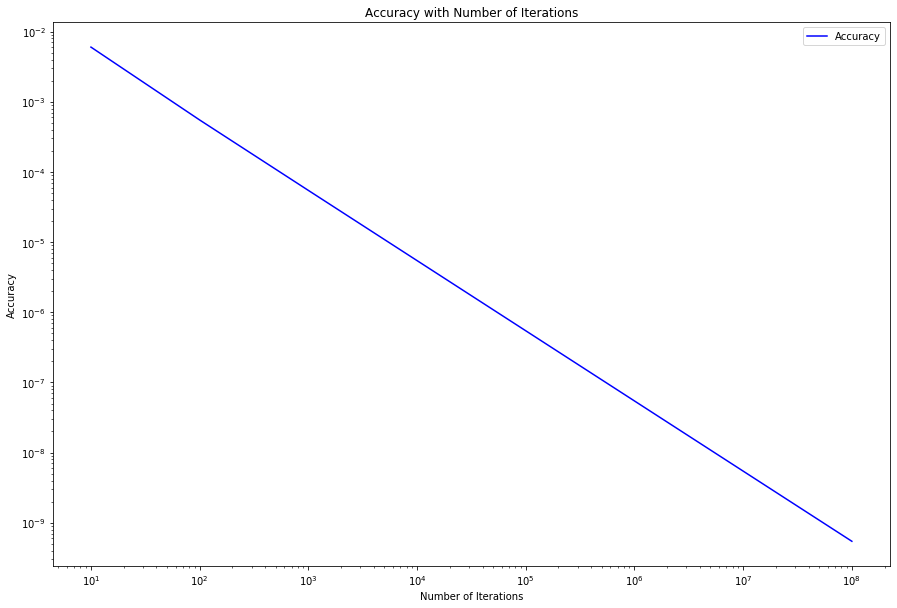

In [7]:
x=np.logspace(1,8,8) #create logspace to use for number of iterations
y=[] #initialise a list to store the values of our rectangular rule integration
for value in x: #for each of our number of iterations
    y.append(rectangular_rule_integration(value)) #find the corresponding integration estimation and append it to y

answer=0.1955011094778852 #Really should be 1/3-1/(2*np.pi)*(3/4)**(1/2) but we're asked to use our value from Task 2 so here it is.

accuracy=abs(np.array(y)-answer) #finding the accuracy of each of our integration values

fig,ax=plt.subplots(figsize=(15,10)) #initialising plot as standard
ax.plot(x,accuracy, 'b-', label='Accuracy') #plotting accuracies versus the number of iterations

ax.set(xlabel='Number of Iterations', ylabel='Accuracy') #labelling
ax.set_title("Accuracy with Number of Iterations") #labelling

#making the scale a log scale as requested
ax.set_yscale('log')
ax.set_xscale('log')

ax.legend() #add a legend

#this graph looked fine to me so I didn't bother with any more formatting

We see that this is definitely a straight line, meaning that we do indeed have $\eta \propto n^{-N}$. To find $N$ I shall employ a polyfit function on what we have plotted.

In [8]:
m, cov=np.polyfit(np.log(x), np.log(accuracy), 1, cov=True) #employing said polyfit function as necessary

print("N±ΔN={0:.6f}±{1:.6f}".format(-m[0], cov[0][0])) #printing value to screen

N±ΔN=1.003797±0.000004


So we see we obtain a value of $1.003797±0.000004$ for N. This means the order of our numerical method is very close to 1, i.e. we virtually have $\eta \propto \frac{1}{n}$.

## Task 4

Use a Monte Carlo method to solve the integral. The method should work as follows:
- Generate a random pair of numbers $(x,y)$ where $x$ is between the limits of integration and y is between $y_{min}$ and $y_{max}$ for those integral limits.
- Test if the pair lies above or below the function i.e. if your number pair $(x,y)$ satifies $y \leq \operatorname{f}(x)$. If it does, add one to a *summation* counter.
- The integral is then given by $I \approx \frac{\text{summation}}{\text{box area}}$, where the box area is given by $\text{box area} = \left(y_{max}-y_{min} \right) \left(x_{max}-x_{min} \right)$. In our case, $x_{min}=y_{min}=0$ so this simplifies considerably.

Then make a plot of performance of the Monte Carlo method versus the number of trials. If time allows, you can plot each point as it is generated for a clear visualisation of how this method works.

This task requires multiple sub-tasks to be executed. I shall do this as follows:
- Firstly, I shall simply plot my function between the integration limits to determine the values for $y_{min}$ and $y_{max}$. Luckily, we see that $\operatorname{f}(x)$ is a monotonic increasing function in the range so we must have $y_{min}=\operatorname{f}(0)$ and $y_{max}=\operatorname{f}(\frac{1}{3})$.
- Next, I defined a function *Monte_Carlo_Integration* which takes as an input the number of trials to execute and then returns the value of the Monte Carlo approximation for the integral. To generate the random number pair within the given limits, I used *np.random.rand* and then simply scaled it accordingly. This generation of random numbers is good enough for our situation, though they are not truly random.
- I then ran this function for various numbers of trials (used a logspace function to generate the trial numbers) and computed the relative accuracy $\eta$. As in Task 3, I then plotted $\eta$ against $n$ and formatted the graph appropriately. I commented on my findings.
- Lastly, I then created a new function *Monte_Carlo_Integration_Visualisation* by tweaking my *Monte_Carlo_Integration* function in order to visualise how the Monte Carlo method works as requested to do. For this, I simply changed my function from computing the approximate integral after all trials had been complete to computing after every trial. I was then able to have the function return the value of the approximate integral after each iteration and to plot this, thus showing how the method works.

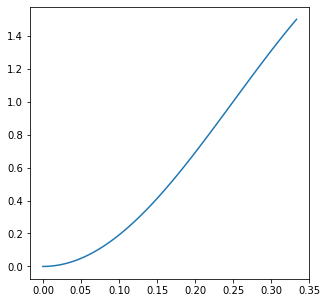

In [9]:
x=np.linspace(0, 1/3, 100) #creating a linspace array of 100 values between our given limits of integration

fig, ax = plt.subplots(figsize=(5,5)) #small graph since I'm not really presenting this as data
ax.plot(x,f(x)) #most basic plot it should suffice to tell me whether I need to do more coding to find my max and min y values

I haven't bothered with labelling since I'm not really presenting this graph in any meaningful context. I'm simply using this plot for myself to see that $y_{min}=\operatorname{f}(0)$ and $y_{max}=\operatorname{f}(\frac{1}{3})$ is indeed the case, and we see that it is. This saves me a bit of work since I don't have to trudge through the list and find the max value.

In [10]:
def Monte_Carlo_Integration(no_trials):
    """This function takes the number of trials as an input and computes the integral of our given function within the given limits using the Monte Carlo method detailed above"""
    counter=0 #initialising a counter variable to keep track of how many co-ordinates are below the function
    for trial in range(no_trials): #pretty self explanatory
        pair=[np.random.rand()*1/3, np.random.rand()*f(1/3)] #creating a random pair of numbers (x,y) between the appropriate values
        if pair[1]<=f(pair[0]): #if our pair is below the curve
            counter+=1 #add one to the counter
    box_area=f(1/3)*1/3 #find the area of the box we're generating random values within
    return counter/no_trials*box_area #return the Monte Carlo approximation for the integral

In [11]:
Monte_Carlo_Integration(300) #test our function outputs reasonably. It does.

0.1933333333333333

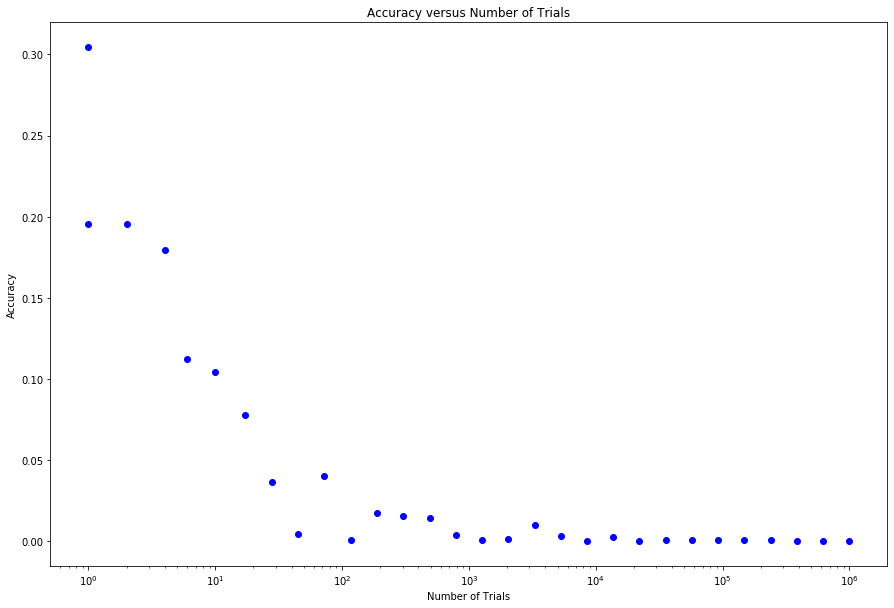

In [12]:
x=np.logspace(0,6,30) #creating array of number of trials
x=x.astype(int) #making sure it is in an integer type
y=[] #creating empty list to store integration approximations in
for value in x: #for each number of trials
    y.append(Monte_Carlo_Integration(value)) #append the Monte Carlo integration approximation to our list y

answer=1/3-1/(2*np.pi)*(3/4)**(1/2) #using the proper answer here since we aren't told to use our approximate one from Task 2

accuracy=abs(np.array(y)-answer) #finding the accuracies as before

fig,ax=plt.subplots(figsize=(15,10)) #initialise plot as standard
ax.plot(x,accuracy, 'bo') #plotting the accuracies verus number of trials

ax.set(xlabel='Number of Trials', ylabel='Accuracy') #labelling
ax.set_title("Accuracy versus Number of Trials") #labelling

ax.set_xscale('log') #using a semi-log scale

#haven't set axis limits since will cut off some of the dots if I limit y axis minimum to zero. Any other limits wouldn't make much sense, so I've just not done them at all.
#other labelling etc. seems fine so I've left the graph as is.

We can clearly see that accuracy does generally improve with the number of trials, but that there is an element of randomness present as expected.


We were asked to visualise how our function works, so I will do that now.

In [13]:
def Monte_Carlo_Integration_Visualisation(no_trials):
    """Here's a function to visualise how the Monte_Carlo_Integration works"""
    counter=0 #same as before
    box_area=f(1/3)*1/3 #same as before
    integral_list=[] #going to store the integral approximation after each trial for visualisation function)
    for trial in range(no_trials): #same as before
        pair=[np.random.rand()*1/3, np.random.rand()*f(1/3)] #same as before
        if pair[1]<=f(pair[0]): #same as before
            counter+=1 #same as before
        integral_list.append(counter/(trial+1)*box_area) #finding the integral approximation after each trial and appending it to our store
    return integral_list #return this store

Text(0.5, 1.0, 'Integral Value Versus Number of Trials')

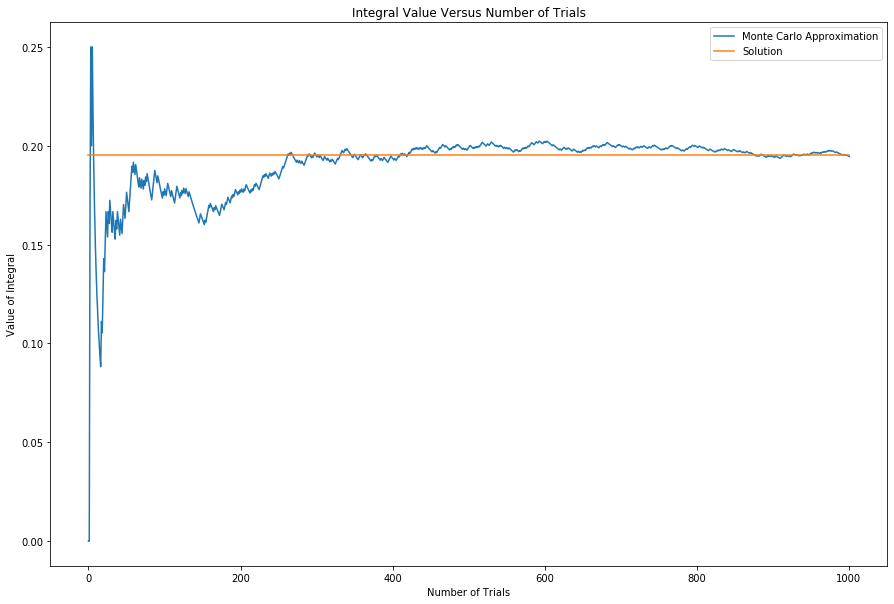

In [14]:
visualisation=Monte_Carlo_Integration_Visualisation(1000) #Getting our list to visualise how our function works

fig,ax=plt.subplots(figsize=(15,10)) #initialising a plot as standard
ax.plot(np.linspace(0,1001,1000), visualisation, label='Monte Carlo Approximation') #plotting our list to visualise the function
ax.plot(np.linspace(0,1001,1000),np.ones(1000)*answer, label="Solution") #plotting the actual value of the integral for comparison
ax.legend() #add a legend

ax.set(xlabel='Number of Trials', ylabel='Value of Integral') #labelling
ax.set_title("Integral Value Versus Number of Trials") #labelling

So we see that as the function continues adding more trials and more data onto it's existing estimate, it gradually comes closer and closer to the actual value. We also note that is fluctuates quite a lot at the start but then settles down as the number of trials increases. We could even use this graph to estimate how many trials would be necessary for our required level of accuracy. In any case, we see that the value of the integral is constantly being updated with each trial and that at the end we end up with a reasonable estimate for the integral itself.